<a href="https://colab.research.google.com/github/shengyi2/spectrum_analysis/blob/main/96_well_plate_screening_for_blue_or_red_shift_FPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Excel file
- Define functions and import modules
- this part needs to be run correctly before the next section
- need to choose a file for upload after running the 3rd cell

In [9]:
# import modules 
from google.colab import files
import pandas as pd
import numpy as np

In [10]:
# open the excel or csv file
def import_Colab(variable):
  print('Import',variable,'data')
 
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    # read excel
  xls = pd.ExcelFile(fn)  

  return xls

In [11]:

# import Excel file with multiple sheets
xls =import_Colab('96-well screening')

Import 96-well screening data


Saving 20210309 EP1 tTFP.xlsx to 20210309 EP1 tTFP (1).xlsx
User uploaded file "20210309 EP1 tTFP.xlsx" with length 61537 bytes


# Organize data in the Excel
  - separate sheets in the Excel files and store in the dictionary Data_sheet

In [12]:
xls.sheet_names

['em', 'ex']

In [13]:
Data_sheet={}
i=0
for name in xls.sheet_names:
  Data_sheet[i]=pd.read_excel(xls, name)
  i+=1
Data_sheet

{0:    SAFIRE II;   Serial number: 501000006;   Firmware: V 1.35 08/2005 Safire2;   XFLUOR4SAFIREII Version: V 4.62n  ... Unnamed: 97
 0                                               Date:                                                             ...         NaN
 1                                               Time:                                                             ...         NaN
 2                                                 NaN                                                             ...         NaN
 3                                             Label 1                                                             ...         NaN
 4                                   Measurement mode:                                                             ...         NaN
 ..                                                ...                                                             ...         ...
 72                                                634                          

# Cleaning data (Trimming the unnecessary part)

In [14]:
# trimming the table with NaN
def trim(df):
  # Drop rows with setting parameters
  df=df.dropna()
  # reset row index (0  1 2 3 4...)
  df=df.reset_index()
  df=df.drop('index',axis=1)
  # replacing column index with first row (Wavelength: A1 A2 A3 ....)
  df.columns=df.iloc[0,:]
  df=df.drop(0,axis=0)
  return df



In [15]:
drop_sheet=[]
for index in Data_sheet:
# remove sheet with limited rows (aborted trials or empty sheets)
# Trim the others in an organized fashion
  if Data_sheet[index].shape[0]<40: 
  # let's set the limit at 40, anything less than 40 is considered aborted
  # edit the row number if you need to change the limit
    drop_sheet.append(index) #store the indeces of sheets to be dropped
  else:
    Data_sheet[index]=trim(Data_sheet[index]) #clean good data
for index in drop_sheet:
  del Data_sheet[index] # drop aborted or empty sheets
Data_sheet

{0: 0  Wavelength:     A1    A2     A3    A4  ...    H9   H10   H11   H12       Em
 1          490   6031  5151  11574  5771  ...  6437  5051  7660  5857  1.17464
 2          494   8988  6690  13583  6739  ...  7176  5940  8621  6443  1.14393
 3          498  10872  8170  14264  6936  ...  7316  6364  8693  6619  1.11936
 4          502  13008  9049  14576  6987  ...  7279  6358  8440  6423  1.10543
 5          506  13991  9734  13990  6925  ...  6862  6136  8045  6035  1.09621
 6          510  14108  9575  13112  6555  ...  6356  5714  7514  5647  1.09214
 7          514  12958  8874  12062  6120  ...  5910  5317  6843  5245  1.09243
 8          518  11062  7660  11008  5442  ...  5445  4858  6357  4782  1.09479
 9          522   9172  6434   9791  4921  ...  4954  4380  5777  4428  1.10079
 10         526   8080  5661   8870  4502  ...  4532  4070  5389  4079  1.10843
 11         530   7176  5194   8248  4118  ...  4238  3851  4954  3771  1.11786
 12         534   6443  4627   7307  

In [18]:
# drop the correction column Em
for index in Data_sheet:
  if 'Em' in Data_sheet[index]:
    Data_sheet[index]=Data_sheet[index].drop('Em', axis=1)
  if 'Ex' in Data_sheet[index]:
    Data_sheet[index]=Data_sheet[index].drop('Ex', axis=1)


In [19]:
# convert objects to integers
for index in Data_sheet:
  Data_sheet[index]=Data_sheet[index].astype(str).astype(int)

In [20]:
Data_sheet[0].describe()

,Wavelength:,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,D1,D2,D3,...,E9,E10,E11,E12,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,570.000000,4063.634146,2898.000000,4572.512195,2305.292683,2478.951220,2431.390244,2647.707317,11872.560976,10494.317073,11005.707317,8919.146341,10747.365854,8445.292683,4680.292683,2705.609756,1744.878049,4043.878049,5516.560976,5139.804878,5066.195122,4633.463415,9746.487805,2148.439024,2185.292683,6642.268293,8085.853659,4948.414634,4741.829268,5077.000000,4006.731707,3792.463415,4275.780488,5556.341463,4482.317073,5272.146341,7882.829268,3830.04878,2280.317073,2649.463415,...,3748.658537,1351.585366,1593.756098,2494.219512,957.804878,956.195122,1353.902439,1380.024390,1165.195122,2315.170732,983.243902,1433.902439,899.951220,1094.463415,2046.780488,1917.121951,842.170732,831.341463,942.585366,1363.073171,1394.707317,1122.536585,4209.780488,2177.853659,2182.634146,2254.536585,2476.365854,2033.756098,1385.219512,862.292683,984.512195,266.609756,1188.585366,1559.219512,1148.170732,2859.634146,2364.512195,2092.658537,2755.219512,2091.585366
std,47.916594,4487.051826,3148.905215,4958.403438,2435.996872,2639.244067,2580.508970,2879.184765,13929.597412,12344.211114,12913.846445,10514.375347,12608.166153,9890.434513,5434.242414,2919.424077,1864.796305,4699.733047,6426.716888,6034.612561,5942.033222,5467.159853,11495.487137,2288.430216,2400.601302,7737.930218,9480.801386,5733.866244,5533.021629,5932.636349,4659.347782,4436.046912,5015.347862,6510.032356,5290.617353,6181.169475,9334.009682,3895.55111,2473.003715,2842.407730,...,4079.792517,1409.117685,1689.867802,2637.802992,956.678923,979.850071,1428.017048,1461.661101,1215.503295,2488.709373,1005.327205,1437.147484,871.445522,1134.047290,2166.222801,1975.122695,823.574493,835.048340,965.510641,1430.207719,1471.054711,1179.179526,4659.871975,2338.779100,2313.649160,2382.656848,2641.698448,2164.853722,1402.259543,868.662571,1003.092372,213.838827,1224.281891,1641.023195,1184.740328,3052.897138,2495.383379,2165.387109,2947.887884,2229.928317
min,490.000000,124.000000,87.000000,132.000000,87.000000,87.000000,85.000000,96.000000,254.000000,220.000000,220.000000,193.000000,222.000000,187.000000,98.000000,81.000000,67.000000,101.000000,116.000000,114.000000,110.000000,88.000000,197.000000,79.000000,75.000000,147.000000,173.000000,110.000000,96.000000,110.000000,96.000000,90.000000,88.000000,128.000000,102.000000,132.000000,138.000000,181.00000,71.000000,100.000000,...,138.000000,51.000000,61.000000,96.000000,53.000000,39.000000,59.000000,61.000000,45.000000,83.000000,39.000000,75.000000,59.000000,50.000000,83.000000,79.000000,57.000000,43.000000,51.000000,65.000000,63.000000,43.000000,138.000000,87.000000,88.000000,92.000000,96.000000,77.000000,76.000000,45.000000,43.000000,26.000000,59.000000,65.000000,53.000000,102.000000,94.000000,88.000000,98.000000,77.000000
25%,530.000000,443.000000,332.000000,498.000000,273.000000,305.000000,305.000000,302.000000,1046.000000,902.000000,1008.000000,769.000000,962.000000,715.00000

# Find the maximum of each column of each spreadsheet

In [22]:
maximum_series={}
maximum_list={}
for index in Data_sheet:
  maximum_series[index]=Data_sheet[index].max()
  maximum_list[index]=maximum_series[index][1:].tolist()

In [23]:
maximum_series


{0: 0
 Wavelength:      650
 A1             14108
 A2              9734
 A3             14576
 A4              6987
                ...  
 H8              9080
 H9              7316
 H10             6364
 H11             8693
 H12             6619
 Length: 97, dtype: int64, 1: 0
 Wavelength:      514
 A1             23046
 A2             15495
 A3             23785
 A4             12386
                ...  
 H8             14661
 H9             12970
 H10            11577
 H11            14920
 H12            11051
 Length: 97, dtype: int64}

In [24]:
maximum_list

{0: [14108,
  9734,
  14576,
  6987,
  7624,
  7716,
  9065,
  46209,
  41252,
  43005,
  34988,
  42231,
  32830,
  17944,
  8628,
  5575,
  15600,
  21399,
  19985,
  19728,
  18337,
  38445,
  6954,
  7479,
  25990,
  31320,
  18905,
  18391,
  19832,
  15617,
  14780,
  16578,
  21748,
  17764,
  20586,
  31191,
  11266,
  7738,
  8294,
  3887,
  4483,
  6029,
  2714,
  3946,
  3644,
  3711,
  5696,
  5165,
  3282,
  2650,
  5189,
  3552,
  4751,
  4939,
  2105,
  4633,
  12171,
  4142,
  5029,
  7639,
  2827,
  2833,
  4174,
  4355,
  3607,
  7342,
  2966,
  4260,
  2564,
  3361,
  6405,
  5835,
  2422,
  2466,
  2922,
  4255,
  4343,
  3435,
  13758,
  6968,
  6745,
  7044,
  7761,
  6353,
  4194,
  2604,
  2972,
  644,
  3619,
  4905,
  3533,
  9080,
  7316,
  6364,
  8693,
  6619],
 1: [23046,
  15495,
  23785,
  12386,
  13251,
  13183,
  12656,
  90793,
  80181,
  88959,
  67559,
  81753,
  62528,
  33048,
  14834,
  9539,
  28499,
  40155,
  38293,
  37904,
  34773,
  73797,

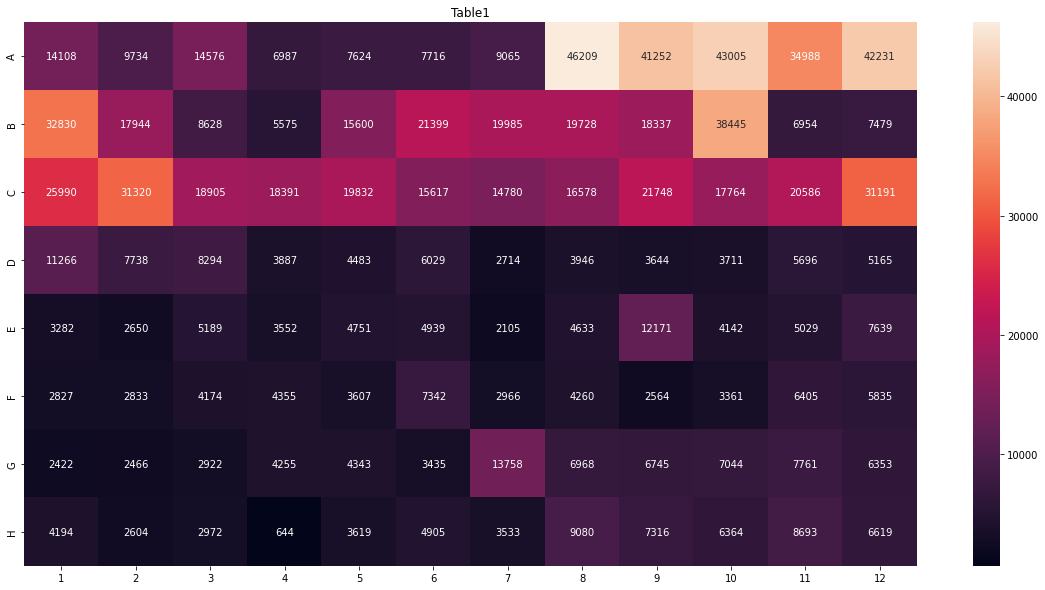

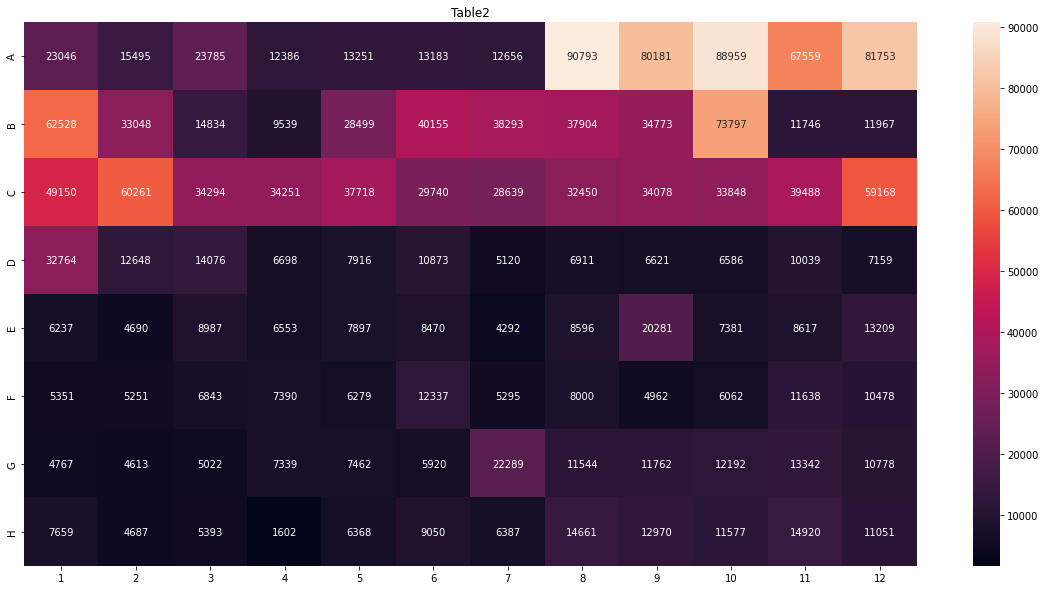

In [31]:
graph_list={}
graph_table={}
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for index in Data_sheet:

  graph_list[index] = [maximum_list[index][i:i+12] for i in range(0, len(maximum_list[0]), 12)]
  Index= ['A','B','C','D','E','F','G','H']
  Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
  graph_table[index]= pd.DataFrame(graph_list[index], columns=Cols, index=Index)


  fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
  ax.set_title('Table'+str(index+1))
  sns.heatmap(graph_table[index], annot=True,fmt='.0f',ax=ax)
  
  fig.savefig('maximum_heatmap '+str(index+1)+'.png')

# Find the peak wavelength of each column of each spreadsheet

In [26]:
maximum_series={}
maximum_rowid_list={}
maximum_peak_nm={}
for index in Data_sheet:
  maximum_series[index]=Data_sheet[index].idxmax()
  maximum_rowid_list[index]=maximum_series[index][1:].tolist()
  maximum_peak_nm[index]=Data_sheet[index].loc[:,'Wavelength:'][maximum_rowid_list[index]].tolist()

In [ ]:
maximum_peak_nm

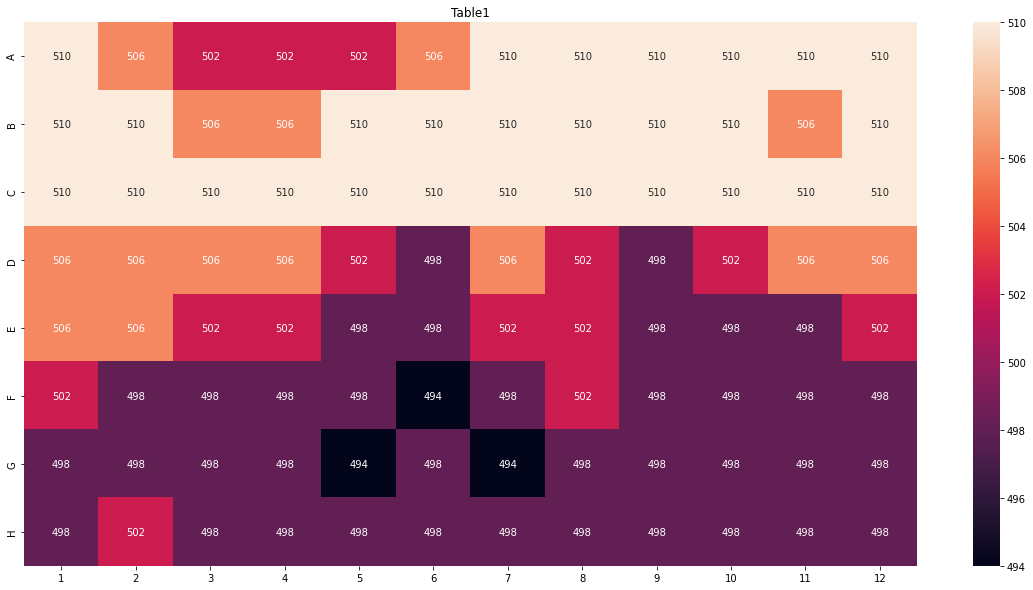

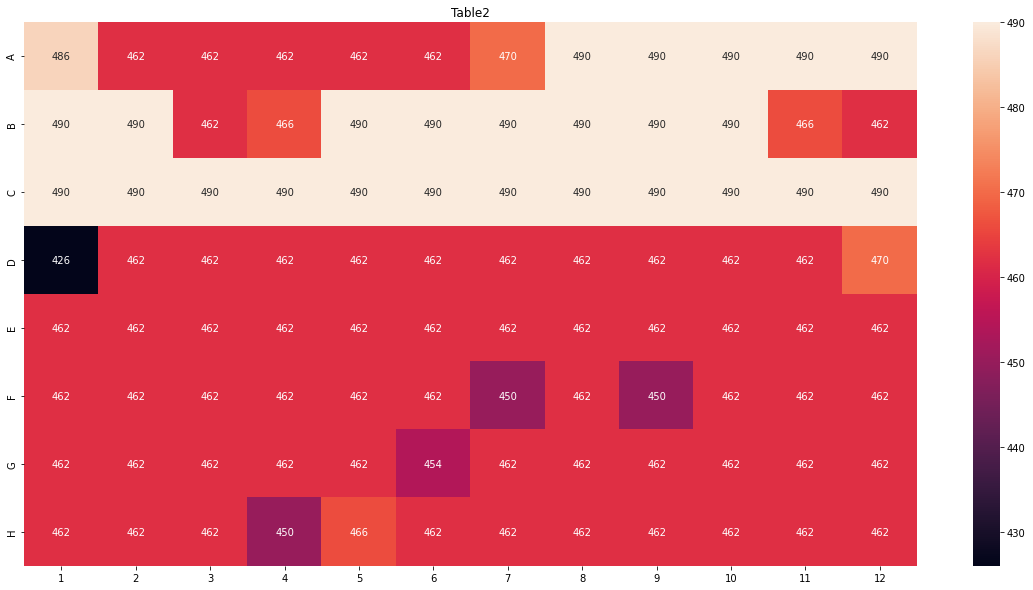

In [32]:
graph_list={}
graph_table={}
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for index in Data_sheet:

  graph_list[index] = [maximum_peak_nm[index][i:i+12] for i in range(0, len(maximum_peak_nm[0]), 12)]
  Index= ['A','B','C','D','E','F','G','H']
  Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
  graph_table[index]= pd.DataFrame(graph_list[index], columns=Cols, index=Index)


  fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
  ax.set_title('Table'+str(index+1))
  sns.heatmap(graph_table[index], annot=True,fmt='.0f',ax=ax)
  
  fig.savefig('maximum_wavelength '+str(index+1)+'.png')

# X, Y plot 
- x: peak wavelength
- y: brightness

In [29]:
# create names from A1 to H12
Index= ['A','B','C','D','E','F','G','H']
Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=[]
for index in Index:
  for col in Cols:
 
    string=index+str(col)
    labels.append(string)


In [30]:
XY_data={}
figure_table={}
import plotly.express as px
for index in Data_sheet:

  XY_data[index] = {'Labels':labels,'Wavelength(nm)': maximum_peak_nm[index], 'Fluorescence intensity': maximum_list[index]}
  figure_table[index] = pd.DataFrame(data=XY_data[index])
  figure_table[index]
  fig = px.scatter(figure_table[index], x="Wavelength(nm)", y="Fluorescence intensity", 
                title="Table "+str(index+1),hover_name="Labels", hover_data=["Wavelength(nm)", "Fluorescence intensity"])
  fig.show()
  fig.write_html('Fluorescence vs. peak wavelength '+str(index+1)+'.html')